<a href="https://colab.research.google.com/github/jgmsgabriel/NotebooksGeo/blob/main/Segmentacao_Casas_Intro_1305.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## U-Net

U-Net é uma arquitetura desenvolvida por Olaf Ronneberger et al. para Segmentação de Imagens Biomédicas em 2015 na Universidade de Freiburg, Alemanha. É uma das abordagens mais popularmente usadas em qualquer tarefa de segmentação semântica hoje. É uma rede neural totalmente convolucional projetada para aprender com menos amostras de treinamento. É uma melhoria em relação ao FCN existente – “Redes totalmente convolucionais para segmentação semântica” desenvolvido por Jonathan Long et al. em 2014).

U-Net é uma arquitetura de rede codificador-decodificador em forma de U, que consiste em quatro blocos codificadores e quatro blocos decodificadores conectados por meio de uma ponte. A rede do codificador (caminho de contração) metade das dimensões espaciais e o dobro do número de filtros (canais de recursos) em cada bloco do codificador. Da mesma forma, a rede de decodificadores dobra as dimensões espaciais e metade do número de canais de recursos.

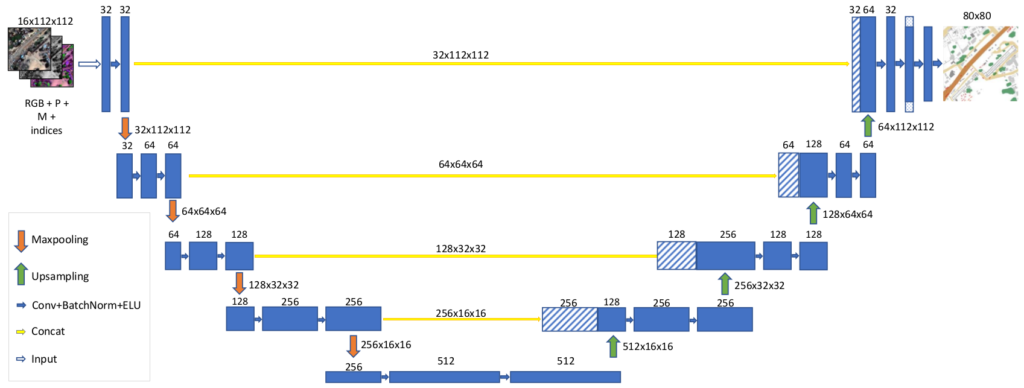

Link Drive: https://drive.google.com/drive/folders/1XjZyqM26IWUanixx_uT1wogCpgtpSCG3?usp=drive_link

Primeiro montamos o Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Aqui, importamos as bibliotecas e funções que vamos precisar:

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras.utils
#import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Agora, vamos definir os caminhos das imagens de máscaras de treinamento, imagens e máscaras de validação e as imagens de teste:

In [ ]:
IMGS_TRAIN_DIR = "/content/drive/MyDrive/Formacoes/Geoprocessamento/Contrucoes/data/train_img"

MASKS_TRAIN_DIR = "/content/drive/MyDrive/Formacoes/Geoprocessamento/Contrucoes/data/train_label"

IMGS_VAL_DIR = "/content/drive/MyDrive/Formacoes/Geoprocessamento/Contrucoes/data/val_img"
MASKS_VAL_DIR = "/content/drive/MyDrive/Formacoes/Geoprocessamento/Contrucoes/data/val_label"

IMGS_TEST_DIR = "/content/drive/MyDrive/Formacoes/Geoprocessamento/Contrucoes/data/test_img"

In [ ]:
train_img_list = os.listdir(IMGS_TRAIN_DIR)
train_msk_list = os.listdir(MASKS_TRAIN_DIR)

In [ ]:
train_img_list.sort()
train_msk_list.sort()

In [ ]:
print(type(train_img_list))
print(len(train_img_list))

print(type(train_msk_list))
print(len(train_msk_list))

<class 'list'>
333
<class 'list'>
333


Então podemos iniciar a importação das imagens e máscaras que serão usadas no treinamento:

In [ ]:
X_train = []
Y_train = []
for img in train_img_list:
  img_filename = os.path.join(IMGS_TRAIN_DIR,img)
  mask_filename = os.path.join(MASKS_TRAIN_DIR,img)
  img = cv2.imread(img_filename)
  mask = cv2.imread(mask_filename)
  X_train.append(img)
  Y_train.append(mask[:,:,0:1])

In [ ]:
print(type(X_train))
print(len(X_train))

print(type(Y_train))
print(len(Y_train))

<class 'list'>
333
<class 'list'>
333


In [ ]:
print(X_train)

[array([[[121, 118, 122],
        [110, 109, 112],
        [104, 101, 105],
        ...,
        [ 89,  95,  90],
        [ 97, 102,  97],
        [ 89,  94,  89]],

       [[125, 124, 126],
        [119, 117, 120],
        [113, 111, 114],
        ...,
        [ 96, 101,  96],
        [ 99, 104,  99],
        [ 94, 100,  94]],

       [[109, 108, 111],
        [111, 111, 113],
        [115, 114, 117],
        ...,
        [112, 117, 110],
        [109, 115, 108],
        [109, 114, 108]],

       ...,

       [[108, 106, 112],
        [100,  99, 105],
        [ 96,  95, 102],
        ...,
        [129, 133, 128],
        [129, 132, 128],
        [125, 128, 124]],

       [[105, 103, 110],
        [ 98,  96, 102],
        [ 89,  88,  95],
        ...,
        [126, 129, 125],
        [124, 127, 123],
        [124, 128, 124]],

       [[100,  98, 104],
        [ 91,  90,  96],
        [ 89,  88,  95],
        ...,
        [123, 126, 122],
        [120, 123, 118],
        [111, 115, 111]

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
print(type(X_train))
print(X_train.shape)

print(type(Y_train))
print(Y_train.shape)

<class 'numpy.ndarray'>
(333, 512, 512, 3)
<class 'numpy.ndarray'>
(333, 512, 512, 1)


Assim podemos ver o tamanho dos nosso dados de treinamento:

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(333, 512, 512, 3)
(333, 512, 512, 1)


Vamos plotar um exemplo de uma imagem e de sua respectiva máscara:

(-0.5, 511.5, 511.5, -0.5)

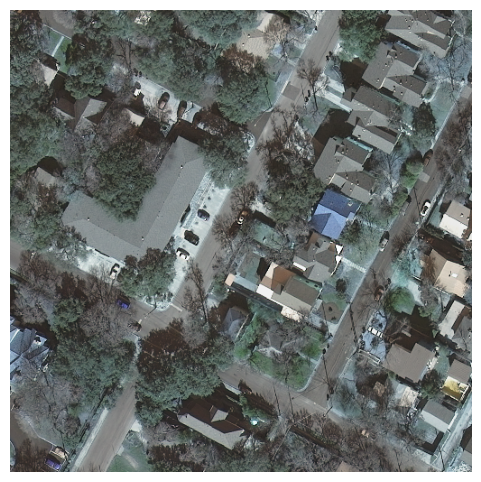

In [ ]:
plt.figure(figsize=[6,6])
plt.imshow(X_train[18])
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

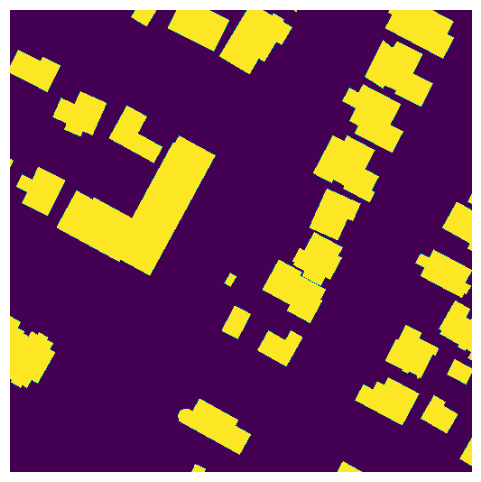

In [ ]:
plt.figure(figsize=[6,6])
plt.imshow(Y_train[18,:,:,0])
plt.axis('off')

Também importamos as imagens e máscaras para validação:

In [ ]:
val_img_list = os.listdir(IMGS_VAL_DIR)
val_msk_list = os.listdir(MASKS_VAL_DIR)

In [ ]:
val_img_list.sort()
val_msk_list.sort()

In [ ]:
print(type(val_img_list))
print(len(val_img_list))

print(type(val_msk_list))
print(len(val_msk_list))

<class 'list'>
37
<class 'list'>
37


In [ ]:
X_val = []
Y_val = []
for img in val_img_list:
  img_filename = os.path.join(IMGS_VAL_DIR,img)
  mask_filename = os.path.join(MASKS_VAL_DIR,img)
  img = cv2.imread(img_filename)
  mask = cv2.imread(mask_filename)
  X_val.append(img)
  Y_val.append(mask[:,:,0:1])

In [ ]:
print(type(X_val))
print(len(X_val))

print(type(Y_val))
print(len(Y_val))

<class 'list'>
37
<class 'list'>
37


In [ ]:
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [ ]:
print(X_val.shape)
print(Y_val.shape)

(37, 512, 512, 3)
(37, 512, 512, 1)


E por fim, importamos as imagens de teste:

In [ ]:
test_img_list = os.listdir(IMGS_TEST_DIR)

In [ ]:
test_img_list.sort()

In [ ]:
X_test = []
for img in test_img_list:
  img_filename = os.path.join(IMGS_TEST_DIR,img)
  img = cv2.imread(img_filename)
  X_test.append(img)

In [ ]:
X_test = np.array(X_test)

In [ ]:
print(X_test.shape)

(100, 512, 512, 3)


Como temos imagens RGB com um range de 0 à 255, vamos dividir nossos dados por 255 para termos apenas valores em um range de 0 a 1.

In [ ]:
X_train = X_train/255
Y_train = Y_train/255

In [ ]:
X_val = X_val/255
Y_val = Y_val/255

In [ ]:
print(X_train)

[[[[0.4745098  0.4627451  0.47843137]
   [0.43137255 0.42745098 0.43921569]
   [0.40784314 0.39607843 0.41176471]
   ...
   [0.34901961 0.37254902 0.35294118]
   [0.38039216 0.4        0.38039216]
   [0.34901961 0.36862745 0.34901961]]

  [[0.49019608 0.48627451 0.49411765]
   [0.46666667 0.45882353 0.47058824]
   [0.44313725 0.43529412 0.44705882]
   ...
   [0.37647059 0.39607843 0.37647059]
   [0.38823529 0.40784314 0.38823529]
   [0.36862745 0.39215686 0.36862745]]

  [[0.42745098 0.42352941 0.43529412]
   [0.43529412 0.43529412 0.44313725]
   [0.45098039 0.44705882 0.45882353]
   ...
   [0.43921569 0.45882353 0.43137255]
   [0.42745098 0.45098039 0.42352941]
   [0.42745098 0.44705882 0.42352941]]

  ...

  [[0.42352941 0.41568627 0.43921569]
   [0.39215686 0.38823529 0.41176471]
   [0.37647059 0.37254902 0.4       ]
   ...
   [0.50588235 0.52156863 0.50196078]
   [0.50588235 0.51764706 0.50196078]
   [0.49019608 0.50196078 0.48627451]]

  [[0.41176471 0.40392157 0.43137255]
   [0.3

Após preparar os dados vamos usar algumas funções do Keras:

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Concatenate, add, Conv2DTranspose, BatchNormalization, Dropout, Activation, Add, AveragePooling2D, Lambda, SeparableConv2D, GlobalAveragePooling2D, DepthwiseConv2D, ZeroPadding2D, LeakyReLU
from keras.activations import relu
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import binary_crossentropy
from keras import backend as K
import tensorflow as tf
from keras.models import load_model
from keras.models import model_from_json
from keras.optimizers import Adam

Primeiro implementamos as funções jaccard loss e a dice loss:

In [ ]:
def jaccard_coef(y_true, y_pred,smooth=100):
  # __author__ = Vladimir Iglovikov
  intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
  sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

  jac = (intersection + smooth) / (sum_ - intersection + smooth)

  return K.mean(jac)

def jaccard_loss(y_true, y_pred):
  return 1 - jaccard_coef(y_true, y_pred)

def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (
                K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)


def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_coef_loss(y_true, y_pred)

Depois implementamos um aumento de dados, tanto para as máscaras, quanto para as imagens:

In [ ]:
img_datagen = ImageDataGenerator(
    rotation_range=90,
    vertical_flip = True,
    horizontal_flip=True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2)

mask_datagen = ImageDataGenerator(
    rotation_range=90,
    vertical_flip = True,
    horizontal_flip=True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2)

In [ ]:
img_datagen.fit(X_train, augment=True,seed=1200)
mask_datagen.fit(Y_train, augment=True,seed=1200)

In [ ]:
X=img_datagen.flow(X_train,batch_size=6,seed=1200)
Y=mask_datagen.flow(Y_train,batch_size=6,seed=1200)

In [ ]:
train_generator = zip(X, Y)

In [ ]:
steps_per_epoch = len(X_train)//6
validation_steps = len(X_val)//6

## Unet

Agora podemos implementar a nossa U-Net usando o Keras:

In [ ]:
upconv = True
droprate = 0.3
inputs = Input(shape=X_train.shape[1:])
conv1 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)


pool1 = BatchNormalization()(pool1)
conv2 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
pool2 = Dropout(droprate)(pool2)

pool2 = BatchNormalization()(pool2)
conv3 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
pool3 = Dropout(droprate)(pool3)

pool3 = BatchNormalization()(pool3)
conv4 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
pool4 = Dropout(droprate)(pool4)

pool4 = BatchNormalization()(pool4)
conv5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv5)
pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
pool5 = Dropout(droprate)(pool5)

pool5 = BatchNormalization()(pool5)
conv6 = Conv2D(1024, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(pool5)
conv6 = Conv2D(1024, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv6)
conv6 = Dropout(droprate)(conv6)

if upconv:
  up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv6), conv5])
else:
  up6 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv5])
up6 = BatchNormalization()(up6)
conv7 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(up6)
conv7 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv7)
conv7 = Dropout(droprate)(conv7)

if upconv:
  up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv7), conv4])
else:
  up7 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv4])
up7 = BatchNormalization()(up7)
conv8 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(up7)
conv8 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv8)
conv8 = Dropout(droprate)(conv8)

if upconv:
  up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv8), conv3])
else:
  up8 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv3])
up8 = BatchNormalization()(up8)
conv9 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(up8)
conv9 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv9)
conv9 = Dropout(droprate)(conv9)

if upconv:
  up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv9), conv2])
else:
  up9 = concatenate([UpSampling2D(size=(2, 2))(conv9), conv2])
up9 = BatchNormalization()(up9)
conv10 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(up9)
conv10 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv10)
conv10 = Dropout(droprate)(conv10)

if upconv:
  up10 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv10), conv1])
else:
  up10 = concatenate([UpSampling2D(size=(2, 2))(conv10), conv1])
up10 = BatchNormalization()(up10)
conv11 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(up10)
conv11 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv11)


conv12 = Conv2D(1, (1, 1), activation='sigmoid')(conv11)
model = Model(inputs=inputs, outputs=conv12)

model.compile(optimizer=Adam(learning_rate = 1e-5), loss = jaccard_loss, metrics=[jaccard_coef, 'accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 512, 512, 32)         896       ['input_2[0][0]']             
                                                                                                  
 conv2d_24 (Conv2D)          (None, 512, 512, 32)         9248      ['conv2d_23[0][0]']           
                                                                                                  
 max_pooling2d_5 (MaxPoolin  (None, 256, 256, 32)         0         ['conv2d_24[0][0]']           
 g2D)                                                                                       

## ResUnet

ResUNet refere-se a U-Net Residual Profunda. É uma arquitetura codificador-decodificador desenvolvida por Zhengxin Zhang et al. para segmentação semântica. Foi inicialmente utilizado para a extração de estradas a partir de imagens aéreas de alta resolução no campo de análise de imagens de sensoriamento remoto. Mais tarde, foi adotado por pesquisadores para várias outras aplicações, como segmentação de pólipos, segmentação de tumores cerebrais, segmentação de imagens humanas e muito mais.

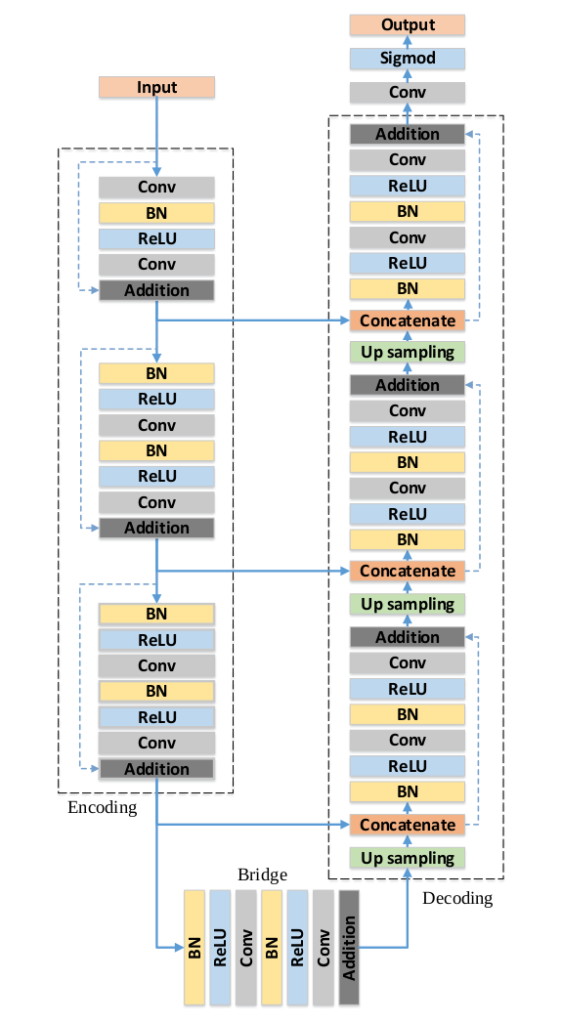

Também podemos implementar a ResUnet com o Keras:

In [ ]:
def conv_block(input_tensor, filters, strides, d_rates):
    x = Conv2D(filters[0], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[0])(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[1], kernel_size=3, strides=strides, kernel_initializer='he_uniform', padding='same', dilation_rate=d_rates[1])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[2], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[2])(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(filters[2], kernel_size=1, kernel_initializer='he_uniform', strides=strides)(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    x = add([x, shortcut])
    x = Activation('relu')(x)

    return x


def identity_block(input_tensor, filters, d_rates):
    x = Conv2D(filters[0], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[0])(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[1], kernel_size=3, kernel_initializer='he_uniform', padding='same', dilation_rate=d_rates[1])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters[2], kernel_size=1, kernel_initializer='he_uniform', dilation_rate=d_rates[2])(x)
    x = BatchNormalization()(x)

    x = add([x, input_tensor])
    x = Activation('relu')(x)

    return x

def one_side_pad(x):
    x = ZeroPadding2D((1, 1))(x)
    x = Lambda(lambda x: x[:, :-1, :-1, :])(x)
    return x

In [ ]:
shape = X_train.shape[1:]
droprate = 0.30
inputs = Input(shape)
conv_1 = Conv2D(32, (3, 3), strides=(1, 1), kernel_initializer='he_uniform', padding='same')(inputs)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Activation("relu")(conv_1)
f1 = conv_1

conv_2 = Conv2D(64, (3, 3), strides=(2, 2), kernel_initializer='he_uniform', padding='same')(conv_1)
conv_2 = BatchNormalization()(conv_2)
conv_2 = Activation("relu")(conv_2)

conv_3 = Conv2D(64, (3, 3), strides=(1, 1), kernel_initializer='he_uniform', padding='same')(conv_2)
conv_3 = BatchNormalization()(conv_3)
conv_3 = Activation("relu")(conv_3)

f2 = conv_3


pool_1 = MaxPooling2D((2, 2), strides=(2, 2))(conv_3)

conv_block1 = conv_block(pool_1, filters=[64, 64, 256], strides=(1, 1), d_rates=[1, 1, 1])
identity_block1 = identity_block(conv_block1, filters=[64, 64, 256], d_rates=[1, 1, 1])
identity_block2 = identity_block(identity_block1, filters=[64, 64, 256], d_rates=[1, 1, 1])
f3 = identity_block2

conv_block2 = conv_block(identity_block2, filters=[128, 128, 256], strides=(2, 2), d_rates=[1, 1, 1])
identity_block3 = identity_block(conv_block2, filters=[128, 128, 256], d_rates=[1, 1, 1])
identity_block4 = identity_block(identity_block3, filters=[128, 128, 256], d_rates=[1, 1, 1])
identity_block5 = identity_block(identity_block4, filters=[128, 128, 256], d_rates=[1, 1, 1])
f4 = identity_block5

identity_block10 = conv_block(identity_block5, filters=[256, 256, 512], strides=(2, 2), d_rates=[1, 1, 1])
for i in range(5):
  identity_block10 = identity_block(identity_block10, filters=[256, 256, 512], d_rates=[1, 2, 1])

f5 = identity_block10

conv_block4 = conv_block(identity_block10, filters=[512, 512, 1024], strides=(2, 2), d_rates=[1, 1, 1])
identity_block11 = identity_block(conv_block4, filters=[512, 512, 1024], d_rates=[1, 2, 1])
identity_block12 = identity_block(identity_block11, filters=[512, 512, 1024], d_rates=[1, 2, 1])
f6 = identity_block12

o = f6

o = (BatchNormalization())(o)
o = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)

o = Conv2DTranspose(1024, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f5]))
o = (BatchNormalization())(o)
o = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)


#o = (UpSampling2D((2, 2)))(o)
o = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f4]))
o = (BatchNormalization())(o)
o = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)


#o = (UpSampling2D((2, 2)))(o)
o = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f3]))
o = (BatchNormalization())(o)
o = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)


#o = (UpSampling2D((2, 2)))(o)
o = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f2]))
o = (BatchNormalization())(o)
o = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Dropout(droprate)(o)

#o = (UpSampling2D((2, 2)))(o)
o = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(o)
o = (concatenate([o, f1]))
o = (BatchNormalization())(o)
o = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)
o = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(o)


o = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(o)

model = Model(inputs=inputs, outputs=o)

model.compile(optimizer=Adam(learning_rate = 1e-5), loss = dice_coef_loss, metrics = [dice_coef,'accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_114 (Conv2D)         (None, 512, 512, 32)         896       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_81 (Ba  (None, 512, 512, 32)         128       ['conv2d_114[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_51 (Activation)  (None, 512, 512, 32)         0         ['batch_normalization_81

Após compilar a arquitetura, passamos os dados de treinamento e validação e iniciamos o treinamento:

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,
                              epochs=50, validation_data=(X_val,Y_val))

<ipython-input-58-9ba87956d351>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,


Epoch 1/50
55/55 [==============================] - 64s 1s/step - loss: 0.6907 - dice_coef: 0.3084 - accuracy: 0.8148 - val_loss: 0.7998 - val_dice_coef: 0.1839 - val_accuracy: 0.8766
Epoch 2/50
55/55 [==============================] - 60s 1s/step - loss: 0.6268 - dice_coef: 0.3726 - accuracy: 0.8074 - val_loss: 0.7735 - val_dice_coef: 0.2107 - val_accuracy: 0.8724
Epoch 3/50
55/55 [==============================] - 61s 1s/step - loss: 0.6218 - dice_coef: 0.3772 - accuracy: 0.8005 - val_loss: 0.7223 - val_dice_coef: 0.2638 - val_accuracy: 0.8564
Epoch 4/50
55/55 [==============================] - 61s 1s/step - loss: 0.6207 - dice_coef: 0.3800 - accuracy: 0.7946 - val_loss: 0.6824 - val_dice_coef: 0.3077 - val_accuracy: 0.8521
Epoch 5/50
55/55 [==============================] - 60s 1s/step - loss: 0.6187 - dice_coef: 0.3818 - accuracy: 0.8075 - val_loss: 0.6420 - val_dice_coef: 0.3511 - val_accuracy: 0.8268
Epoch 6/50
55/55 [==============================] - 60s 1s/step - loss: 0.5570 -

Após finalizar o treinamento vamos plotas a curva de acurácia e a curva de loss:

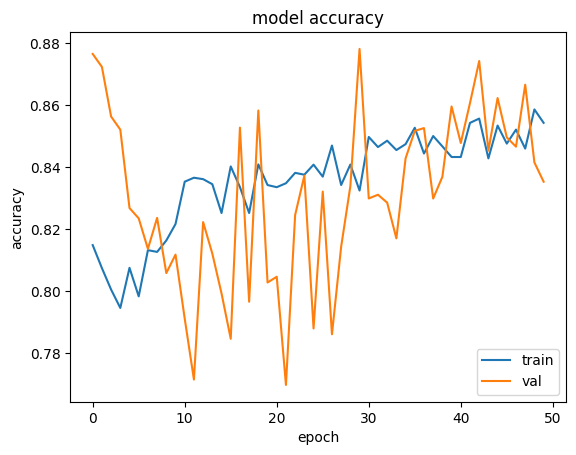

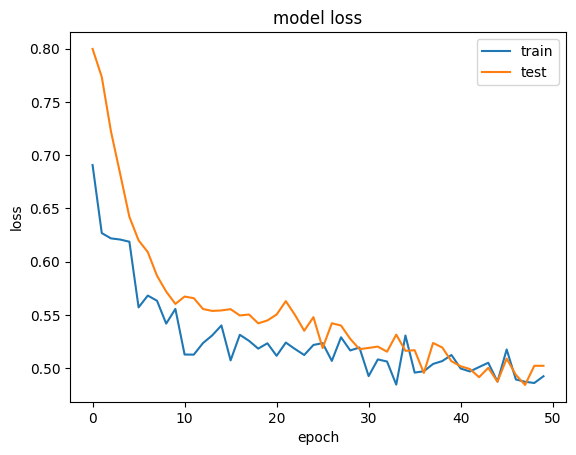

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Vamos também ver a acurácia no dataset de treinamento:

In [ ]:
predict = model.predict(X_train)
pred = np.round(predict)
true = Y_train
accuracy = accuracy_score(true.flatten(),pred.flatten())
print('Acuraccy on Train Set: ',accuracy)

Assim podemos predizer algumas imagens que foram usadas no treinamento e comparar com a mascara original:

In [ ]:
predict = model.predict(X_val)

(-0.5, 511.5, 511.5, -0.5)

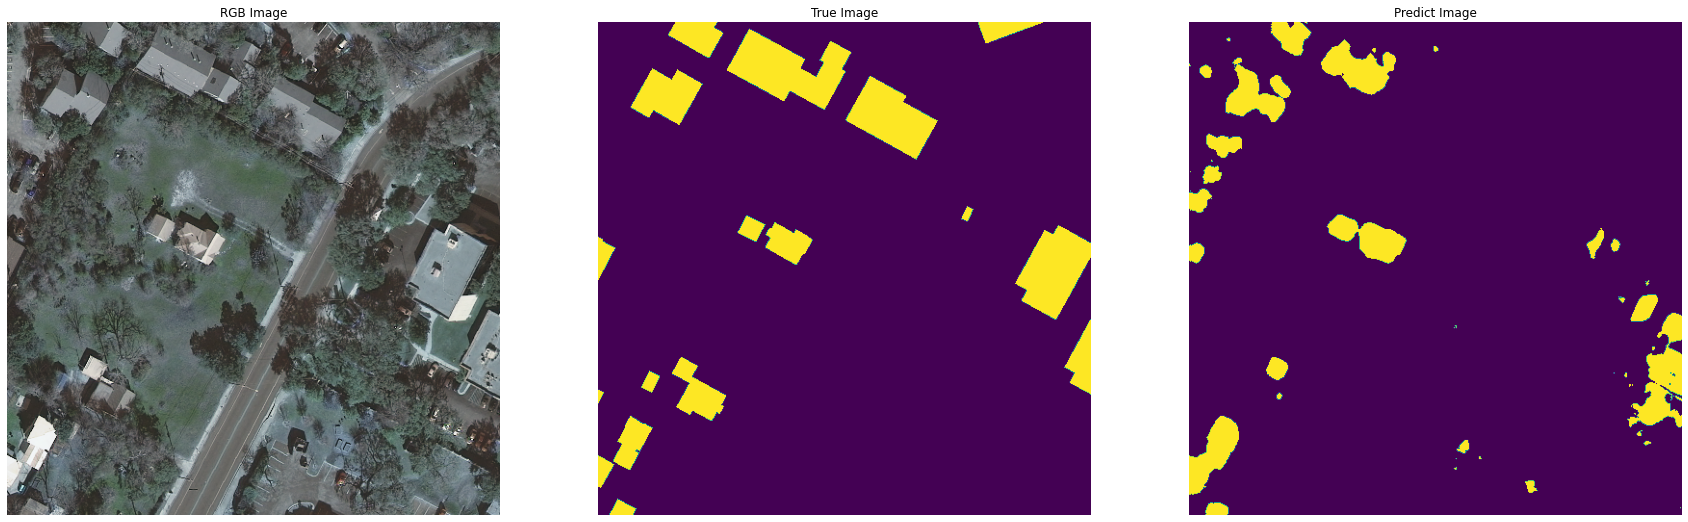

In [ ]:
i = 2
plt.figure(figsize=[30,30])
plt.subplot(131)
plt.imshow(X_val[i,:,:,0:3])
plt.title('RGB Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(np.round(Y_val[i,:,:,0]))
plt.title('True Image')
plt.axis('off')
plt.subplot(133)
plt.imshow(np.round(predict[i,:,:,0]))
plt.title('Predict Image')
plt.axis('off')

Vamos calcuar a acurácia nos dados de validação:

In [ ]:
pred = np.round(predict)
true = Y_val
accuracy = accuracy_score(true.flatten(),pred.flatten())
print('Acuraccy on Validation Set: ',accuracy)

Acuraccy on Validation Set:  0.8957117441538218


E por fim, vamos predizer as imagens de teste que nunca foram usadas para treinar ou validar o modelo de segmentação:

In [ ]:
X_test = X_test/255

In [ ]:
predict = model.predict(X_test)

Plotamos a comparação da imagem RGB com a máscara predita do modelo:

(-0.5, 511.5, 511.5, -0.5)

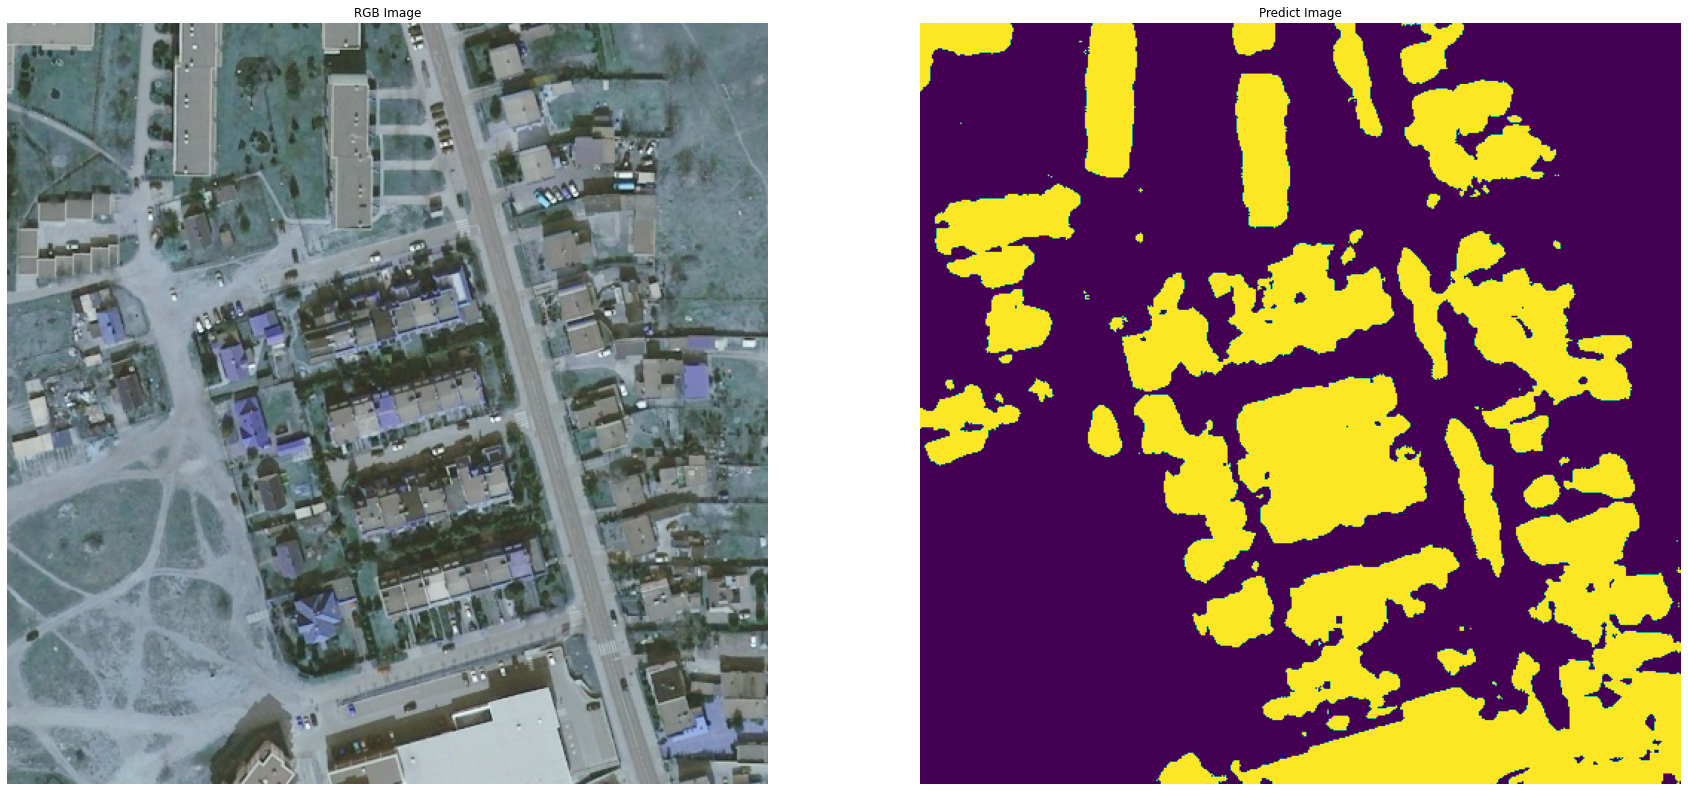

In [ ]:
i = 0
plt.figure(figsize=[30,30])
plt.subplot(121)
plt.imshow(X_test[i,:,:,0:3])
plt.title('RGB Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(np.round(predict[i,:,:,0]))
plt.title('Predict Image')
plt.axis('off')

Também podemos salvar as máscaras preditas em imagens e armazena-las em uma pasta no content do Colab, possibilitando realizar o donwload dessas imagens:

In [ ]:
if not os.path.isdir('/content/predict'):
    os.mkdir('/content/predict')

In [ ]:
save_path = '/content/predict'

In [ ]:
for i in range(len(predict)):
  im = np.round(predict[i])
  full_im = im * 255
  full_im = full_im.astype('uint8')
  full_save_path = os.path.join(save_path,test_img_list[i])
  print(full_save_path)
  cv2.imwrite(full_save_path, full_im)



/content/predict/370.png
/content/predict/371.png
/content/predict/372.png
/content/predict/373.png
/content/predict/374.png
/content/predict/375.png
/content/predict/376.png
/content/predict/377.png
/content/predict/378.png
/content/predict/379.png
/content/predict/380.png
/content/predict/381.png
/content/predict/382.png
/content/predict/383.png
/content/predict/384.png
/content/predict/385.png
/content/predict/386.png
/content/predict/387.png
/content/predict/388.png
/content/predict/389.png
/content/predict/390.png
/content/predict/391.png
/content/predict/392.png
/content/predict/393.png
/content/predict/394.png
/content/predict/395.png
/content/predict/396.png
/content/predict/397.png
/content/predict/398.png
/content/predict/399.png
/content/predict/400.png
/content/predict/401.png
/content/predict/402.png
/content/predict/403.png
/content/predict/404.png
/content/predict/405.png
/content/predict/406.png
/content/predict/407.png
/content/predict/408.png
/content/predict/409.png
